# Implementing K-means clustering

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
np.random.seed(0)
%matplotlib inline

In [19]:
# Load the data
seeds = pd.read_csv('Seed_Data.csv')

In [21]:
#Look at the data
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [22]:
# Seperate the X features and target into two arrays
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]
y = seeds['target']

In [23]:
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [24]:
# Build the k-means function
def k_means(X,K): 
    # Keep track of history so you can see K-Means in action 
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True: 
        # Euclidean distance calculated for each point relative to centroids, then np.argmin returns 
        # index location of min distance = which cluster a point is assigned to
        labels = np.argmin(cdist(X,centroids), axis=1)
        labels_history.append(labels)
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and ends. Otherwise, continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, centroids_history, labels_history

In [25]:
# Convert pandas dataframe into a numpy matrix
X_mat = X.values

In [26]:
# Run seeds matrix through the k_means function
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [27]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Plot the coordinates

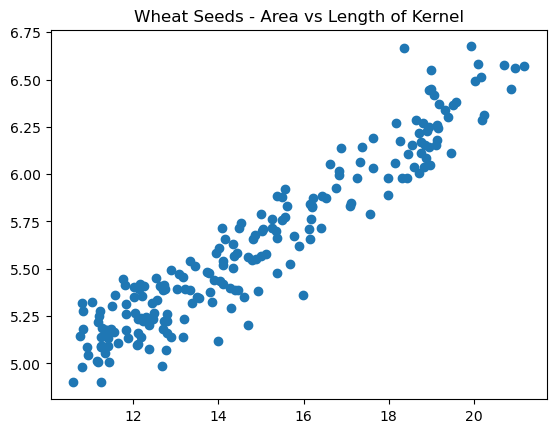

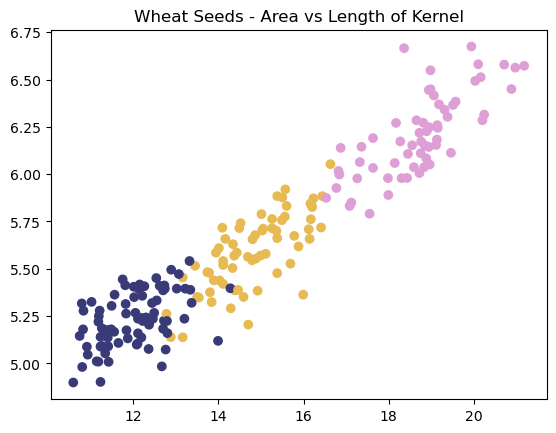

In [29]:
plt.scatter(X['A'],X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
plt.scatter(X['A'],X['LK'], c = labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [30]:
# Calculate silhouette score
silhouette_score(X[['A','LK']], labels)

0.5875704550892775